In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline 

In [ ]:
pokemon=pd.read_csv('pokemon.csv')
pokemon.head()

In [ ]:
order_genid=pokemon['generation_id'].value_counts().index

In [ ]:
sb.countplot(data=pokemon,x='generation_id',color=base,order=order_genid)

In [ ]:
base=sb.color_palette()[0]


In [ ]:
pokemon['generation_id'].value_counts()

In [ ]:
sb.countplot(data=pokemon,x='type_1',color=base)
plt.xticks(rotation=90)

In [ ]:

sb.countplot(data=pokemon,x='generation_id',color=base,order=order_genid)

In [36]:
#sb.countplot(data='pkmn_types',x='type',color=base)

In [6]:
pokemon.isna().sum()

id                   0
species              0
generation_id        0
height               0
weight               0
base_experience      0
type_1               0
type_2             402
hp                   0
attack               0
defense              0
speed                0
special-attack       0
special-defense      0
dtype: int64

In [7]:
#pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          #value_vars = ['type_1', 'type_2'], 
                          #var_name = 'type_level', value_name = 'type').dropna()
#pkmn_types.head()

In [8]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [20]:
type_cols=['type_1','type_2']
non_type_cols=pokemon.columns.difference(type_cols)
pokemon_types=pokemon.melt(id_vars=non_type_cols,value_vars=type_cols,var_name='type level',value_name='type').dropna()
pokemon_sub=pokemon_types.loc[pokemon_types['type'].isin(['fairy','dragon'])]
pokemon_sub

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type level,type
34,45,113,48,1,0.6,70,35,60,65,clefairy,35,7.5,type_1,fairy
35,70,217,73,1,1.3,95,36,95,90,clefable,60,40.0,type_1,fairy
146,64,60,45,1,1.8,41,147,50,50,dratini,50,3.3,type_1,dragon
147,84,147,65,1,4.0,61,148,70,70,dragonair,70,16.5,type_1,dragon
148,134,270,95,1,2.2,91,149,100,100,dragonite,80,210.0,type_1,dragon
172,25,44,28,2,0.3,50,173,45,55,cleffa,15,3.0,type_1,fairy
174,20,49,65,2,0.3,35,175,40,65,togepi,20,1.5,type_1,fairy
175,40,142,85,2,0.6,55,176,80,105,togetic,40,3.2,type_1,fairy
208,80,60,50,2,0.6,60,209,40,40,snubbull,30,7.8,type_1,fairy
209,120,158,75,2,1.4,90,210,60,60,granbull,45,48.7,type_1,fairy


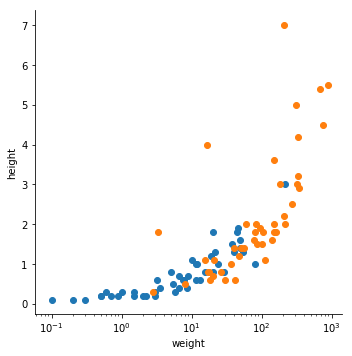

In [23]:
g=sb.FacetGrid(data=pokemon_sub,hue='type',size=5)
g.map(plt.scatter,'weight','height')
g.set(xscale='log')

(0, 200)

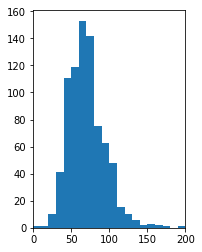

In [27]:
plt.subplot(1,2,2)
bin_edges=np.arange(0,pokemon['hp'].max()+5,10)
plt.hist(data=pokemon,x=pokemon['hp'],bins=bin_edges)
plt.xlim((0,200))